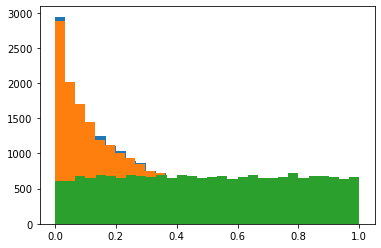

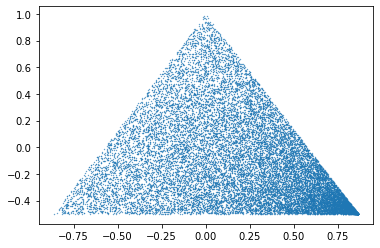

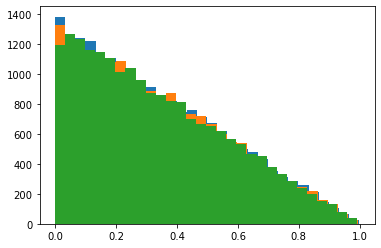

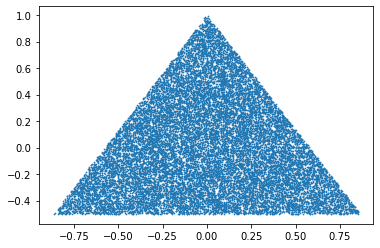

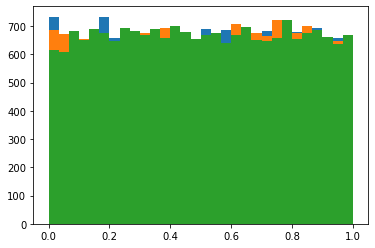

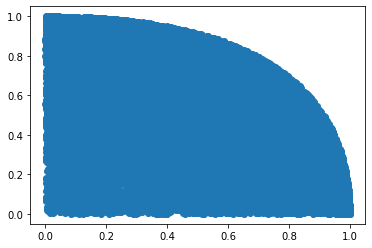

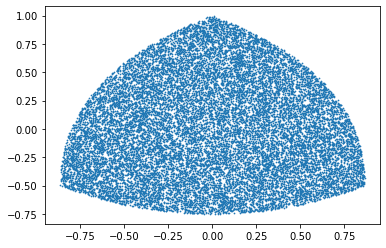

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# We have to generate 3 (potentially 'n') random numbers that sum to 1. In addition, points must be uniformly distributed.
# A simple way to do this is to first define the surface we're working with.
# In this case, since we're generating 3D points, the surface would be the plane x+y+z=1, bounded by x>0, y>0, z>0
# The random points are populated iteratively, dimension-by-dimension.
# If we have an (i-1) dimension set of points that are uniform, we can get an i dimensional set by doing this:
# Interpolate linearly between each point in the (i-1) dimensional set, and the (i+1)th contrain point on the surface
# Perform this interpolation using a uniformly distributed random number.
# In all, this process will have to be carried out n-1 times.
# This yields points that are uniformly distributed over the plane of interest.
# If we want points that are uniformly ditributed in some other basis, we must use transformation of variables.

# np.random.seed(0)
p1 = (1, 0, 0)
p2 = (0, 1, 0)
p3 = (0, 0, 1)

iters = 20000
x = np.zeros(iters)
y = np.zeros(iters)
z = np.zeros(iters)
rands = np.random.rand(2, iters)

x = (p1[0]*rands[0]+p2[0]*(1-rands[0]))*(rands[1])+(p3[0]*(1-(rands[1])))
y = (p1[1]*rands[0]+p2[1]*(1-rands[0]))*(rands[1])+(p3[1]*(1-(rands[1])))
z = (p1[2]*rands[0]+p2[2]*(1-rands[0]))*(rands[1])+(p3[2]*(1-(rands[1])))

plt.hist(x, bins=30)
plt.hist(y, bins=30)
plt.hist(z, bins=30)
plt.show()

pts = np.array([x, y, z])
rot_mat = np.array([[-np.sin(np.pi/3), 0,  np.sin(np.pi/3)],
                    [-np.cos(np.pi/3), 1, -np.cos(np.pi/3)]])
pts_rot = np.dot(rot_mat, pts)

plt.scatter(pts_rot[0], pts_rot[1], s=0.1)
plt.show()


x = (p1[0]*rands[0]+p2[0]*(1-rands[0]))*np.sqrt(rands[1])+(p3[0]*(1-np.sqrt(rands[1])))
y = (p1[1]*rands[0]+p2[1]*(1-rands[0]))*np.sqrt(rands[1])+(p3[1]*(1-np.sqrt(rands[1])))
z = (p1[2]*rands[0]+p2[2]*(1-rands[0]))*np.sqrt(rands[1])+(p3[2]*(1-np.sqrt(rands[1])))

plt.hist(x, bins=30)
plt.hist(y, bins=30)
plt.hist(z, bins=30)
plt.show()

pts = np.array([x, y, z])
rot_mat = np.array([[-np.sin(np.pi/3), 0, np.sin(np.pi/3)],
                    [-0.5,             1, -0.5]])
pts_rot = np.dot(rot_mat, pts)

plt.scatter(pts_rot[0], pts_rot[1], s=0.5)
plt.show()

d1 = x*(2-x)
d2 = y*(2-y)
d3 = z*(2-z)
plt.hist(d1, bins=30)
plt.hist(d2, bins=30)
plt.hist(d3, bins=30)
plt.show()

plt.scatter(d1, d2)
plt.show()

pts = np.array([d1, d2, d3])
rot_mat = np.array([[-np.sin(np.pi/3), 0, np.sin(np.pi/3)],
                    [-0.5,             1, -0.5]])
pts_rot = np.dot(rot_mat, pts)

plt.scatter(pts_rot[0], pts_rot[1], s=0.5)
plt.show()

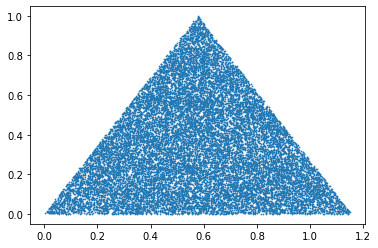

In [13]:
t1 = np.random.rand(iters)
t2 = np.random.rand(iters)
h1 = np.minimum(t1, t2)
h2 = np.maximum(t1, t2)-h1
# y = np.sqrt(3)*x-(2*h2)
plt.scatter((h1+(2*h2))/np.sqrt(3), h1, s=0.5)
plt.show()